### 1. Importing libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

### 2. Loading/Spliting MNIST dataset

In [2]:
mnist_dataset = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

### 3. Data Preprocessing/viewing

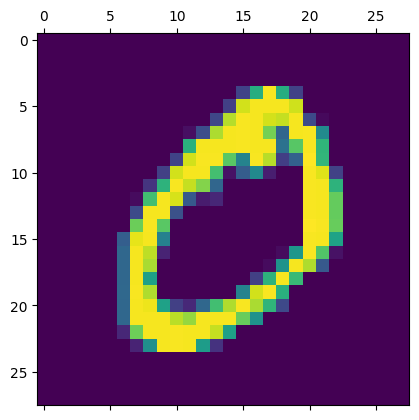

In [6]:
plt.matshow(x_train[1])

### 4. Normalization

In [7]:
x_train = x_train/255
x_test = x_test/255

### 5. Defining the network architecture

In [8]:
model = tf.keras.Sequential([ # the model starts with a Flatten layer to prepare the input.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

### 6. Training the Network

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6351 - accuracy: 0.8410 - val_loss: 0.3588 - val_accuracy: 0.9021
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.9056 - val_loss: 0.2967 - val_accuracy: 0.9173
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.9176 - val_loss: 0.2664 - val_accuracy: 0.9263
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9263 - val_loss: 0.2430 - val_accuracy: 0.9314
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9330 - val_loss: 0.2247 - val_accuracy: 0.9384
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2186 - accuracy: 0.9384 - val_loss: 0.2065 - val_accuracy: 0.9426
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2019 - accuracy: 0.9438 - val_loss: 0.1930 - val_accuracy:

### 7. Evaluating the network

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9619
Loss=0.133
Accuracy=0.962


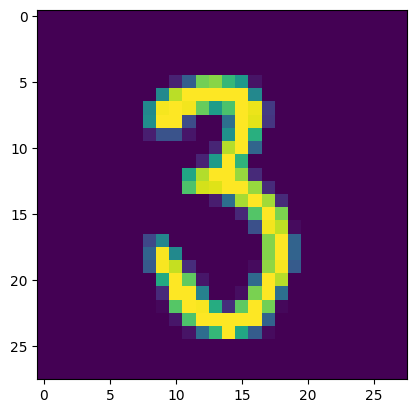

In [13]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [15]:
predicted_value = model.predict(x_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n])) # Returns the maximum values index

313/313 [==============================] - 0s 1ms/step
Handwritten number in the image is = 3


### 8. Ploting Training and Validation Accuracy

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

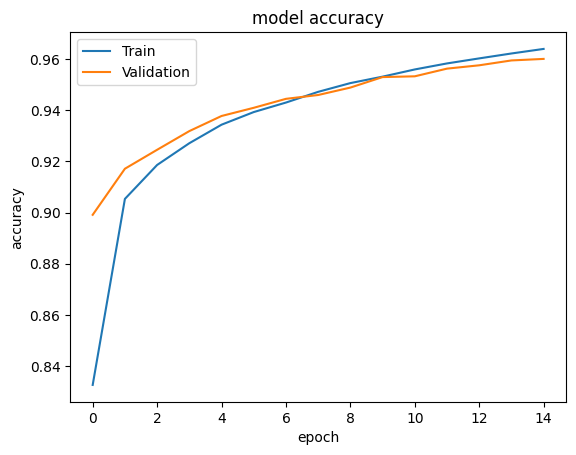

In [22]:
plt.plot(history.history['accuracy']) # Training Accuracy
plt.plot(history.history['val_accuracy']) # Validation Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 9. Ploting Training and Validation Loss


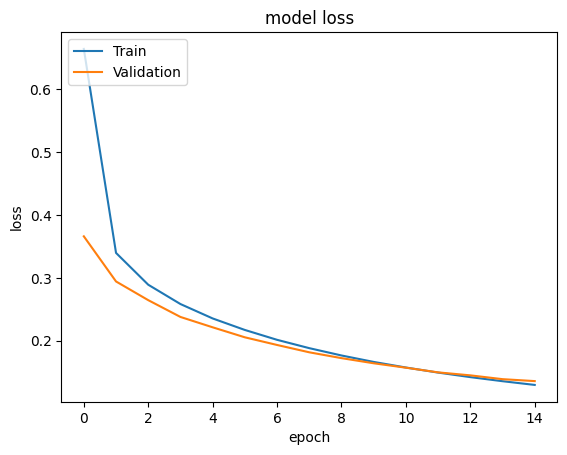

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()